In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('sales_channel.csv')

In [3]:
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
df.shape

(200, 5)

In [5]:
df.columns

Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [6]:
df.dtypes

Unnamed: 0      int64
TV            float64
radio         float64
newspaper     float64
sales         float64
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [8]:
df.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [9]:
df.isnull().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

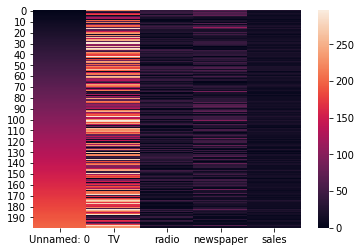

In [10]:
sns.heatmap(df)

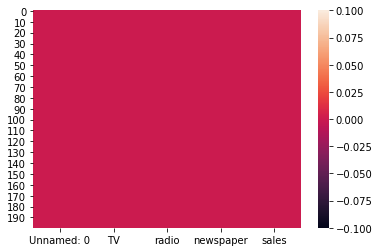

In [23]:
sns.heatmap(df.isnull())

In [11]:
dfcor=df.corr()
dfcor

,Unnamed: 0,TV,radio,newspaper,sales
Unnamed: 0,1.000000,0.017715,-0.110680,-0.154944,-0.051616
TV,0.017715,1.000000,0.054809,0.056648,0.782224
radio,-0.110680,0.054809,1.000000,0.354104,0.576223
newspaper,-0.154944,0.056648,0.354104,1.000000,0.228299
sales,-0.051616,0.782224,0.576223,0.228299,1.000000


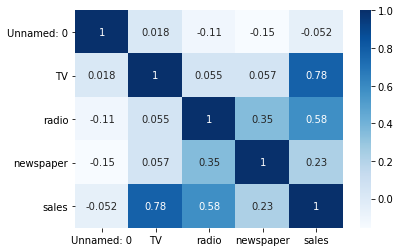

In [12]:
sns.heatmap(dfcor,cmap='Blues',annot=True)

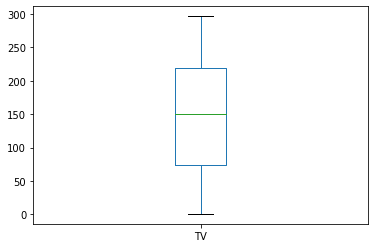

In [17]:
df['TV'].plot.box()

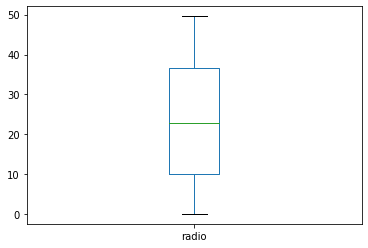

In [18]:
df['radio'].plot.box()

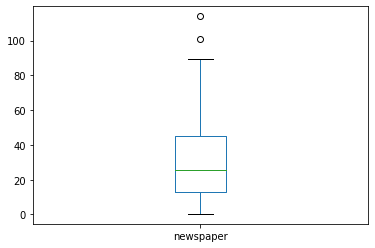

In [19]:
df['newspaper'].plot.box()

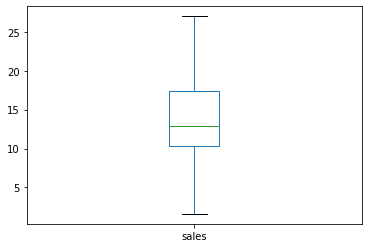

In [20]:
df['sales'].plot.box()

Unnamed: 0       AxesSubplot(0.125,0.536818;0.227941x0.343182)
TV            AxesSubplot(0.398529,0.536818;0.227941x0.343182)
radio         AxesSubplot(0.672059,0.536818;0.227941x0.343182)
newspaper           AxesSubplot(0.125,0.125;0.227941x0.343182)
sales            AxesSubplot(0.398529,0.125;0.227941x0.343182)
dtype: object

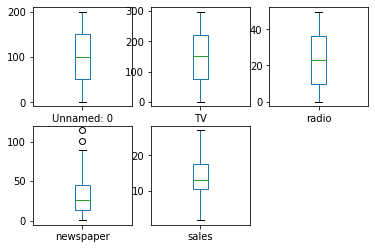

In [21]:
df.plot(kind='box',subplots=True,layout=(2,3))

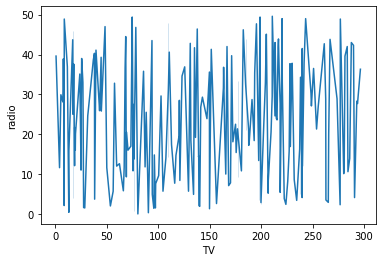

In [24]:
sns.lineplot(x='TV',y='radio',data=df)

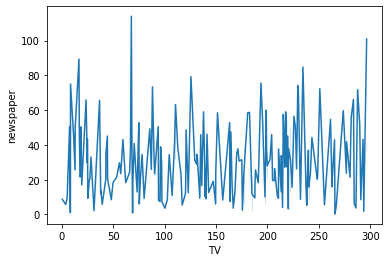

In [25]:
sns.lineplot(x='TV',y='newspaper',data=df)
plt.show()

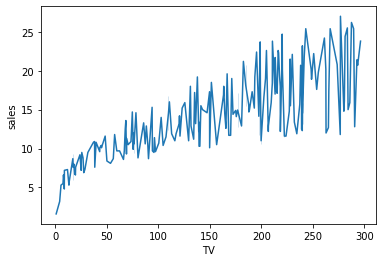

In [26]:
sns.lineplot(x='TV',y='sales',data=df)#Relationship between TV and Sales is strong

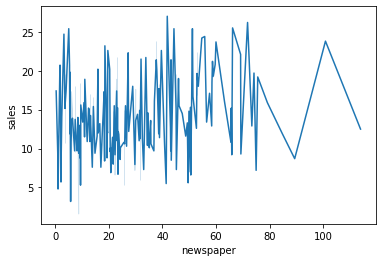

In [27]:
sns.lineplot(x='newspaper',y='sales',data=df)
plt.show()

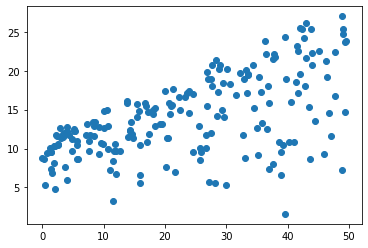

In [29]:
plt.scatter(df['radio'],df['sales'])
plt.show() # Moderate relationship between radio and sales

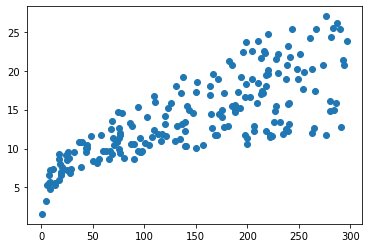

In [30]:
plt.scatter(df['TV'],df['sales'])
plt.show() #Relationship between TV and Sales is strong

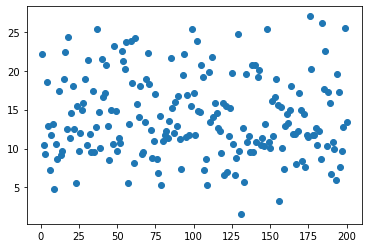

In [31]:
plt.scatter(df['Unnamed: 0'],df['sales'])
plt.show() #very poor relationship between the unknown channels and sales probably because they are diverse

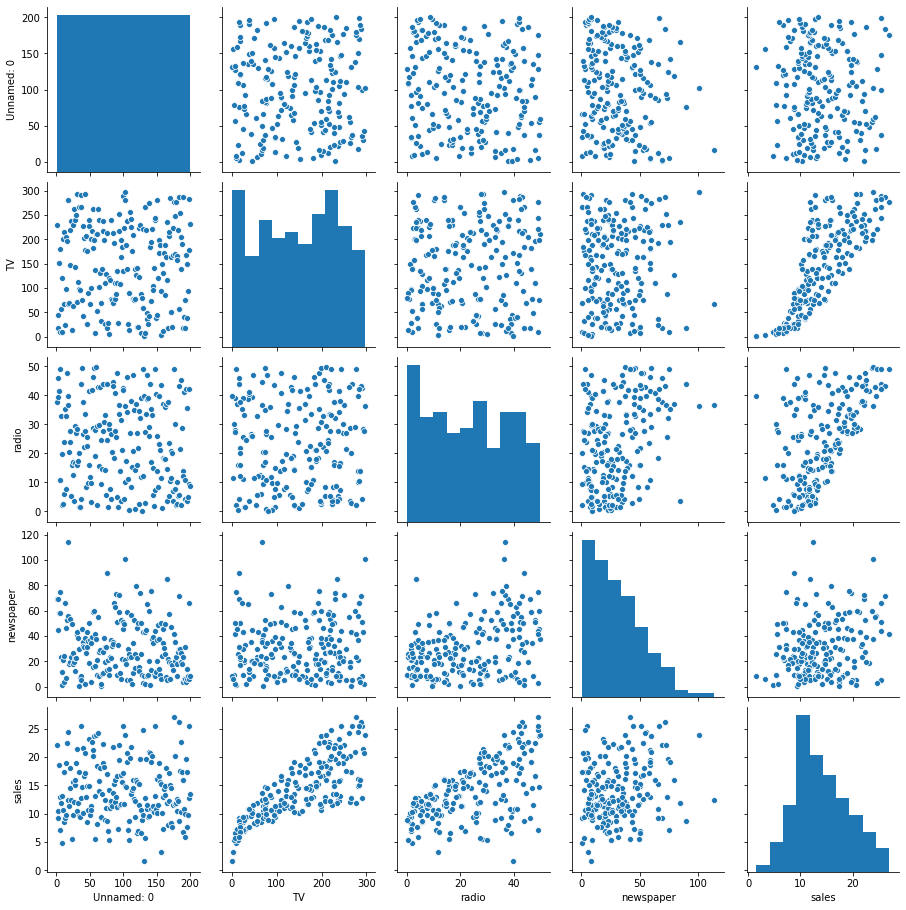

In [32]:
sns.pairplot(df)

In [35]:
collist=df.columns.values
ncol=5
nrows=1

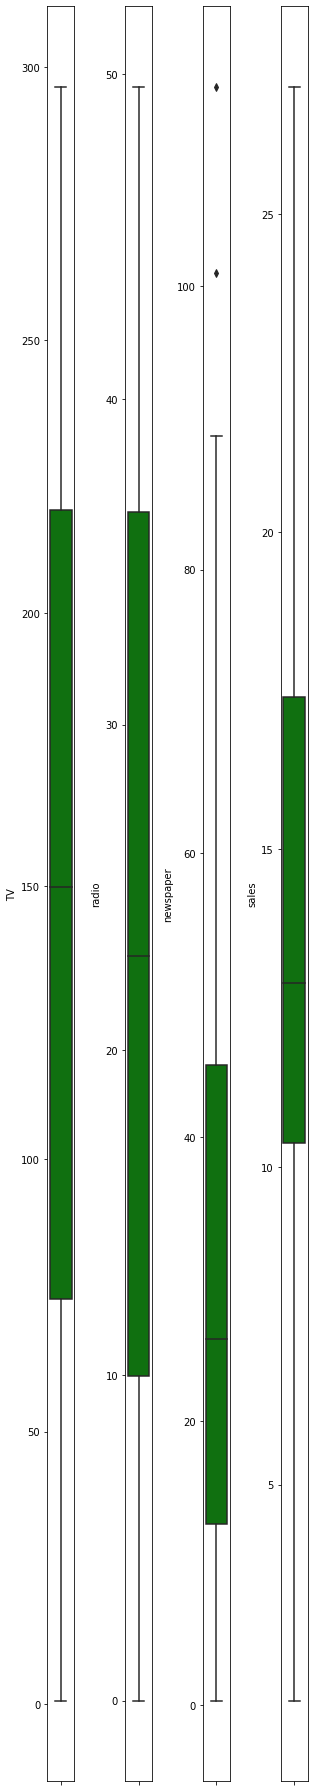

In [36]:
plt.figure(figsize=(ncol,5*ncol))
for i in range(1, len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color='green',orient='v')
    plt.tight_layout()

In [37]:
from scipy.stats import zscore
z_score=abs(zscore(df))
print(df.shape)
df_new=df.loc[(z_score<3).all(axis=1)]
print(df_new.shape)#outliers have been removed

(200, 5)
(198, 5)


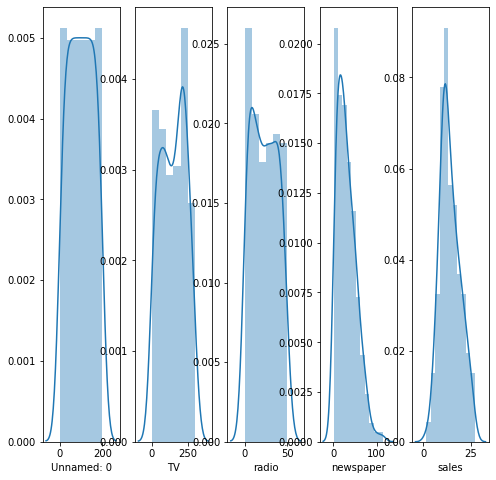

In [41]:
plt.figure(figsize=(8,8))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(df[collist[i]])

In [42]:
df_new.skew()

Unnamed: 0   -0.006283
TV           -0.082332
radio         0.114842
newspaper     0.650112
sales         0.407130
dtype: float64

In [43]:
from scipy.stats import boxcox
# 0= log transform
# .5 = square root transform
df_new['newspaper']=boxcox(df_new['newspaper'],0)

In [44]:
df_new.skew()

Unnamed: 0   -0.006283
TV           -0.082332
radio         0.114842
newspaper    -1.221802
sales         0.407130
dtype: float64

In [45]:
#seperating my input and output variables
x=df_new.iloc[:,0:-1]
x.head()

,Unnamed: 0,TV,radio,newspaper
0,1,230.1,37.8,4.237001
1,2,44.5,39.3,3.808882
2,3,17.2,45.9,4.238445
3,4,151.5,41.3,4.069027
4,5,180.8,10.8,4.067316


In [46]:
y=pd.DataFrame(df_new['sales'])
y.head()

,sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9


In [47]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(df_new)
x=pd.DataFrame(x,columns=df_new.columns)

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=86,test_size=0.24)

In [50]:
x_train.shape,x_test.shape

((150, 5), (48, 5))

In [51]:
y_train.shape,y_test.shape

((150, 1), (48, 1))

In [55]:
import sklearn
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split
lm = LinearRegression()
def maxr2_score(lm,x,y):
    max_r_score=0
    for r_state in range(42,101):
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.24)
        lm=LinearRegression()
        lm.fit(x_train,y_train)
        y_pred=lm.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        print('r2_score corresponding to random state; ',r_state,' is: ',r2_scr)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state

    print('max r2 score corresponding to ',final_r_state,' is ',max_r_score)
maxr2_score(lm, x,y)

r2_score corresponding to random state;  42  is:  1.0
r2_score corresponding to random state;  43  is:  1.0
r2_score corresponding to random state;  44  is:  1.0
r2_score corresponding to random state;  45  is:  1.0
r2_score corresponding to random state;  46  is:  1.0
r2_score corresponding to random state;  47  is:  1.0
r2_score corresponding to random state;  48  is:  1.0
r2_score corresponding to random state;  49  is:  1.0
r2_score corresponding to random state;  50  is:  1.0
r2_score corresponding to random state;  51  is:  1.0
r2_score corresponding to random state;  52  is:  1.0
r2_score corresponding to random state;  53  is:  1.0
r2_score corresponding to random state;  54  is:  1.0
r2_score corresponding to random state;  55  is:  1.0
r2_score corresponding to random state;  56  is:  1.0
r2_score corresponding to random state;  57  is:  1.0
r2_score corresponding to random state;  58  is:  1.0
r2_score corresponding to random state;  59  is:  1.0
r2_score corresponding to ra

In [56]:
#using cross validation to check over/under fitting
from sklearn.model_selection import cross_val_score
a_score=cross_val_score(linear_model.LinearRegression(),x,y,cv=5,scoring="r2")
a_score

array([1., 1., 1., 1., 1.])

In [57]:
#final model
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=80,test_size=0.20)
lm=linear_model.LinearRegression()
lm.fit(x_train,y_train)
y_pred=lm.predict(x_test)

In [58]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
print('RMSE is: ',np.sqrt(mean_squared_error(y_test,y_pred)))
print('r2_score: ',r2_score(y_test,y_pred))

RMSE is:  5.263909126864562e-15
r2_score:  1.0


In [59]:
#saving the model
from sklearn.externals import joblib
filename='lm_sales_channelfile.obj'

In [60]:
joblib.dump(lm,'lm_sales_channelfile.obj')

['lm_sales_channelfile.obj']